<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE255-DataMining/blob/main/Assignment_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Load the Dataset and Initial Exploration

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Sem1/CMPE255 - Data Mining/Assignment 7/dataset 7.3.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Dataset Overview

The dataset has been successfully loaded, and here's a glimpse of the first few rows:

- It contains both numerical and categorical columns.
- Columns like age, balance, day, duration, campaign, pdays, and previous are numerical.
- Columns like job, marital, education, default, housing, loan, contact, month, poutcome, and y are categorical.
- The target variable appears to be y, which is categorical.

## Next Steps

1. **Data Preprocessing:** This would include handling missing values (if any) and encoding categorical variables.

2. **Feature Selection:** We need to decide whether to use all features or select a few for PCA.

3. **Normalization:** PCA is affected by scale, so we need to scale the features in the data before applying PCA.

## Step 2: Data Preprocessing

We should check for missing values and handle categorical variables. Categorical variables need to be encoded as PCA requires numerical input.

In [3]:
# Step 2: Data Preprocessing

# Check for missing values
missing_values = data.isnull().sum()

# Encode categorical variables using pd.get_dummies
# 'drop_first=True' to avoid multicollinearity issues
data_encoded = pd.get_dummies(data, drop_first=True)

missing_values, data_encoded.head()

(age          0
 job          0
 marital      0
 education    0
 default      0
 balance      0
 housing      0
 loan         0
 contact      0
 day          0
 month        0
 duration     0
 campaign     0
 pdays        0
 previous     0
 poutcome     0
 y            0
 dtype: int64,
    age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
 0   58     2143    5       261         1     -1         0                0   
 1   44       29    5       151         1     -1         0                0   
 2   33        2    5        76         1     -1         0                0   
 3   47     1506    5        92         1     -1         0                1   
 4   33        1    5       198         1     -1         0                0   
 
    job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
 0                 0              0  ...          0          0          1   
 1                 0              0  ...          0          0          1   
 2    

## Data Preprocessing Overview

### Missing Values:
There are no missing values in the dataset, so no imputation is necessary.

### Categorical Variable Encoding:
Categorical variables have been encoded. The dataset now contains 43 features, a mix of original numerical features and encoded categorical features.

### Analysis:
- The dataset is now fully numerical and suitable for PCA.
- The target variable y has been encoded as y_yes.
- We have successfully avoided potential multicollinearity issues by dropping the first category in each categorical variable.

## Step 3: Feature Normalization

Before applying PCA, we should normalize the features because PCA is sensitive to the variances of the initial variables. If there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges.

In [4]:
from sklearn.preprocessing import StandardScaler

# Step 3: Feature Normalization

# Separating out the features
X = data_encoded.drop('y_yes', axis=1)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled data
pd.DataFrame(X_scaled, columns=X.columns).head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,-0.523740,5.422561,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,1.909346,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519


## Feature Normalization Overview

The features have been successfully normalized. Each feature now has a mean of approximately 0 and a standard deviation of 1.

### Analysis:
- The scaled dataset is ready for PCA. The normalization step ensures that each feature contributes equally to the result.
- This normalization is crucial because PCA is sensitive to the variances of the initial variables.

## Step 4: Applying PCA

We are now ready to apply PCA to the scaled data for dimensionality reduction. We will:

- Apply PCA while retaining enough components to explain a significant portion of the variance (e.g., 95%).
- Analyze the variance ratio explained by each principal component.
- Transform the scaled data into the new PCA space.

In [6]:
from sklearn.decomposition import PCA

# Step 4: Applying PCA

# Initialize PCA, setting to retain 95% of the variance
pca = PCA(n_components=0.95)

# Fit and transform the scaled data using PCA
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame of the PCA results
pca_results = pd.DataFrame(X_pca)

# Variance ratio explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

pca_results.head(), explained_variance_ratio

(         0         1         2         3         4         5         6   \
 0 -0.653389 -0.788309 -0.188959  3.588629 -0.257441 -0.318785 -0.035356   
 1 -1.116539  2.113086 -1.660176 -0.221970  1.108027 -0.874044 -1.063970   
 2 -1.709466  1.901324  0.308661  1.243072 -0.771877 -0.793928  1.445894   
 3 -1.589450  1.471965  0.922258  2.560104  0.957121  1.859099 -0.172763   
 4 -0.987928  0.261372 -1.333983  0.915099  4.191455  4.083251 -0.785002   
 
          7         8         9   ...        24        25        26        27  \
 0 -0.747431 -0.920503 -0.838447  ...  0.022350  0.218658  0.071383  0.270363   
 1 -0.885165 -0.738380 -0.572178  ...  0.092379  0.094288 -0.210088 -0.382077   
 2 -0.677262  0.903902 -0.111131  ...  1.496406 -0.386170  0.679402  1.017531   
 3  1.878844 -1.615483  1.494319  ... -1.765713 -0.912158  0.455283 -1.443922   
 4  4.131509 -0.266558  3.123135  ...  5.010847 -0.470306  1.104476  1.714818   
 
          28        29        30        31        32  

## PCA Application Overview

PCA has been applied to the scaled data, and the results are as follows:

### PCA Results:
A new DataFrame `pca_results` containing the transformed features has been created. The first few rows of this transformed dataset are displayed.

### Explained Variance:
The array `explained_variance_ratio` shows the proportion of the dataset's variance that lies along each principal component.

### Analysis:
- The PCA transformed the data into 34 principal components (from the original 42 features) while retaining 95% of the variance.
- The first principal component explains approximately 7.18% of the variance, while the second explains about 6.36%, and so on.
- This reduction in dimensionality can help in visualizing high-dimensional data and can also be beneficial in machine learning tasks, reducing the computational cost and potentially improving model performance.

## Further Analysis Steps

For further analysis, we can consider the following steps:

1. **PCA Components Analysis:** Examine the composition of the first few principal components to understand which original features contribute most to these components.

2. **Variance Explained Visualization:** Create a plot to visualize the cumulative variance explained by the principal components.

3. **PCA Components Visualization:** Visualize the data in the space of the first two or three principal components. This can reveal interesting structures in the data that are not apparent in the higher-dimensional space.

## Step 5: PCA Components Analysis

We will analyze the composition of the first few principal components to understand which original features contribute most significantly to these components.

In [7]:
# Step 5: PCA Components Analysis

# Number of components to analyze
num_components_to_display = 5

# Getting the absolute value of the PCA components
pca_components = abs(pca.components_)

# Creating a DataFrame for better visualization and interpretation
components_df = pd.DataFrame(pca_components, columns=X.columns).head(num_components_to_display)

components_df

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.016053,0.056004,0.054011,0.015621,0.085032,0.445761,0.355695,0.107452,0.013469,0.026568,...,0.083045,0.147035,0.061919,0.090192,0.083979,0.090197,0.105724,0.285667,0.241091,0.497211
1,0.173815,0.106385,0.085615,0.014601,0.089261,0.212418,0.124339,0.239633,0.029194,0.060973,...,0.110898,0.002501,0.039970,0.347727,0.069088,0.041651,0.023482,0.130481,0.000745,0.173738
2,0.441471,0.042068,0.016614,0.008074,0.003323,0.087050,0.076957,0.112581,0.023066,0.085819,...,0.047868,0.016880,0.000306,0.109771,0.035659,0.049287,0.027498,0.046864,0.058819,0.101822
3,0.089822,0.076169,0.160603,0.003128,0.078351,0.068427,0.049661,0.109408,0.056919,0.025039,...,0.271259,0.189788,0.013749,0.293988,0.025466,0.022762,0.005495,0.027636,0.001179,0.052501
4,0.113221,0.096799,0.356817,0.040265,0.116548,0.051184,0.023965,0.082856,0.064340,0.069287,...,0.268464,0.412427,0.078691,0.124845,0.152171,0.094024,0.130993,0.055491,0.141215,0.015363


## PCA Components Analysis

We have analyzed the composition of the first five principal components. Each row in the DataFrame represents a principal component, and each column corresponds to the original features. The values represent the weight or contribution of each feature to the principal component.

### Key Observations:

- **Principal Component 1 (PC1):** The features pdays, previous, and poutcome_unknown have the highest weights, indicating these features contribute significantly to PC1.

- **Principal Component 2 (PC2):** Features like age, job_blue-collar, and month_may are more prominent in this component.

- **Subsequent Components:** Other components show varied contributions from different features.

### Analysis:

- The components reveal which features vary together. For instance, PC1's high weight for pdays and previous suggests these features vary in unison and capture similar information.

- This analysis can help in understanding the underlying structure of the data and what features drive the most variance in the dataset.

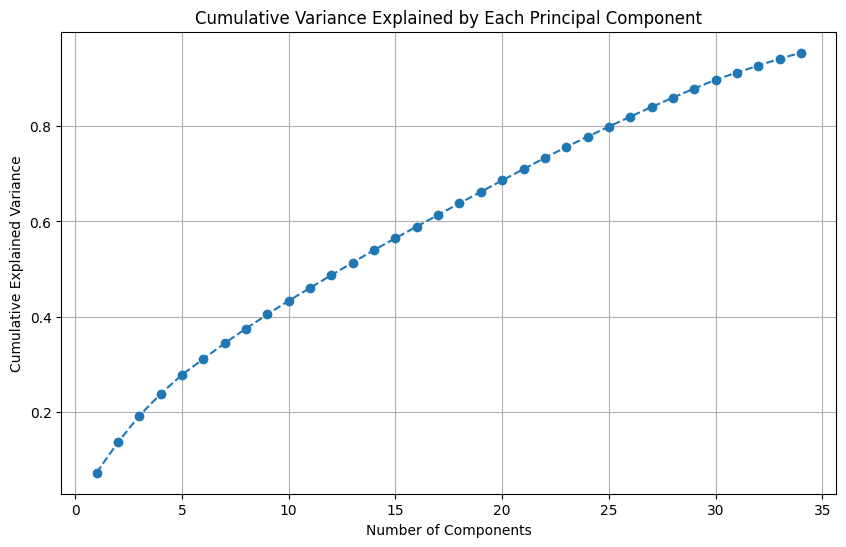

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Step 6: Visualization of the Cumulative Variance Explained by the Principal Components

# Calculate the cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Generate the plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Variance Explained by Each Principal Component')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

## Variance Explained Visualization

- The x-axis represents the number of principal components.
- The y-axis represents the cumulative explained variance.
- Each point on the line shows the total amount of variance captured by using up to that number of principal components.
- Typically, the plot starts steeply and then levels off, indicating that early components explain a significant amount of variance and additional components contribute less.

In the case of your data, the plot would help in identifying the point at which adding more components has diminishing returns in terms of explained variance.